<a href="https://colab.research.google.com/github/arminsoltan/mohaymen/blob/main/Phase05/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis without Neural Networks

In [ ]:
!pip install parsivar
!pip install hazm

     |████████████████████████████████| 36.2 MB 63 kB/s 
     |████████████████████████████████| 1.5 MB 53.4 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492971 sha256=fe31b86505f09916bcb555123fbe01b05bc91926e7ea1b591e726581295a04e9
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449921 sha256=8c8e43bd58b47ca183bfd85938aa3edb41d7b60fc7e056fe07b9a6e2dfa4fb82
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 316 kB 4.0 MB/s 
     |████████████████████████████████| 1.4 MB 60.4 MB/s 
     |████████████████████████████████| 233 kB 41.7 MB/s 
  Created wheel 

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import parsivar
from parsivar import Normalizer, Tokenizer, FindStems, POSTagger, FindChunks
import matplotlib.pyplot as plt
import pandas as pd
import string
import re
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Mohaymen/Phase05/snappfood/train.csv", sep="\t")
test_data = pd.read_csv("/content/drive/MyDrive/Mohaymen/Phase05/snappfood/test.csv", sep="\t")
valid_data = pd.read_csv("/content/drive/MyDrive/Mohaymen/Phase05/snappfood/dev.csv", sep="\t")

In [ ]:
train_data.head()

,Unnamed: 0,comment,label,label_id
0,0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


In [ ]:
test_data.head()

,Unnamed: 0,comment,label,label_id
0,0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,HAPPY,0
1,1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,HAPPY,0
2,2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,SAD,1
3,3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,SAD,1
4,4,باز هم میگم، پیتزا نباید اینقد چرب باشه,SAD,1


In [ ]:
valid_data.head()

,Unnamed: 0,comment,label,label_id
0,0,همه ساندویچ‌ها سرد بود متاسفانه در صورتی که فا...,SAD,1
1,1,تشکر، عالی‌تر از همیشه,HAPPY,0
2,2,مرغ و کدو رو دوس نداشتم ولی کلا ساندویچهای خوش...,HAPPY,0
3,3,نمیدونم هزینه بسته بندی به چه دلیل گرفته شد؟؟؟,SAD,1
4,4,یک نوشابه کم ارسال شد و تاخیر فراوان و غذای نس...,SAD,1


In [ ]:
train_data = train_data[["comment", "label_id"]]
test_data = test_data[["comment", "label_id"]]
valid_data = valid_data[["comment", "label_id"]]

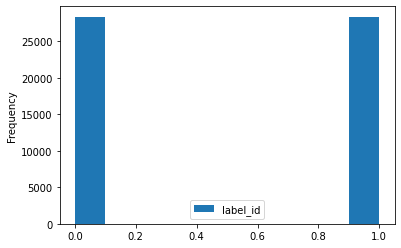

In [ ]:
train_data.plot.hist("label_id")

**Text preprocessing**

In [ ]:
def data_preprocessing(review, stopwords):
  try:
    # print(review)
    review = re.sub("\u200c", " ", review)

    normalizer = Normalizer()
    review = normalizer.normalize(review)

    review = re.sub("\u200c", " ", review)
    review = filter(lambda x: x in string.whitespace or x not in string.printable, review)
    review = ''.join(ch for ch in list(review))

    tokenizer = Tokenizer()
    
    words = tokenizer.tokenize_words(review)

    stemmer = FindStems()
    review = [stemmer.convert_to_stem(word) for word in words]
    
    words = filter(lambda x: x not in stopwords, review)
    words = list(words)
    
    words = ' '.join(words)
    words = re.sub("&", " ", words)
    return words
  except TypeError:
    print(review)
    raise  

  

In [ ]:
normalizer = Normalizer()
comment = str(train_data.iloc[[10]].comment)
comment = re.sub("\u200c", " ", comment)
comment

'10    اکلر فوق العاده بود اما بافت چیزکیک مونده بود ...\nName: comment, dtype: object'

In [ ]:
normalizer = Normalizer()
comment = normalizer.normalize(comment)

comment = re.sub("\u200c", " ", comment)
comment = filter(lambda x: x in string.whitespace or x not in string.printable, comment)
comment = ''.join(ch for ch in list(comment))
comment

' اکلر فوق العاده بود اما بافت چیزکیک مونده بود \n    ،   '

In [ ]:
tokenizer = Tokenizer()
words = tokenizer.tokenize_words(comment)
print(words)

['اکلر', 'فوق', 'العاده', 'بود', 'اما', 'بافت', 'چیزکیک', 'مونده', 'بود', '،']


In [ ]:
stemmer = FindStems()
comment = [stemmer.convert_to_stem(word) for word in words]
print(comment)

['اکلر', 'فوق', 'العاده', 'بود&باش', 'اما', 'بافت', 'چیزکیک', 'مو', 'بود&باش', '،']


In [ ]:
file = open("/content/drive/MyDrive/Mohaymen/Phase05/stopwords.txt")
stopwords = file.read().splitlines()
file.close()

In [ ]:
words = filter(lambda x: x not in stopwords, comment)
words = list(words)
print(words)

['اکلر', 'العاده', 'بود&باش', 'بافت', 'چیزکیک', 'مو', 'بود&باش']


In [ ]:
words = ' '.join(words)
print(words)

اکلر العاده بود&باش بافت چیزکیک مو بود&باش


In [ ]:
! pip install pandarallel

  Created wheel for pandarallel: filename=pandarallel-1.5.2-py3-none-any.whl size=18398 sha256=9333dc4ea698396f03612c31c4ae539d6ffa6643f8d7cdc50e8e8e002a011706
  Stored in directory: /root/.cache/pip/wheels/b5/6d/51/9ece2eaf007ea3f7fb0ce053c5773b2eb0d308887da3af12c1
Successfully built pandarallel


In [ ]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
train_data["preprocessing"] = train_data["comment"].parallel_apply(lambda text: data_preprocessing(str(text), stopwords))
train_data.to_pickle("/content/drive/MyDrive/Mohaymen/Phase05/snappfood/train_data.pkl")

In [ ]:
train_data.to_csv("/content/drive/MyDrive/Mohaymen/Phase05/snappfood/train_data_preprocessing.csv")

In [ ]:
test_data["preprocessing"] = test_data["comment"].parallel_apply(lambda text: data_preprocessing(str(text), stopwords))
test_data.to_pickle("/content/drive/MyDrive/Mohaymen/Phase05/snappfood/test_data.pkl")

In [ ]:
test_data.to_csv("/content/drive/MyDrive/Mohaymen/Phase05/snappfood/test_data_preprocessing.csv")

In [ ]:
valid_data["preprocessing"] = test_data["comment"].parallel_apply(lambda text: data_preprocessing(str(text), stopwords))
valid_data.to_pickle("/content/drive/MyDrive/Mohaymen/Phase05/snappfood/valid_data.pkl")

In [ ]:
valid_data.to_csv("/content/drive/MyDrive/Mohaymen/Phase05/snappfood/valid_data_preprocessing.csv")

In [ ]:
train_data.head()

,comment,label_id,preprocessing
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,1,حیف وقت نوشت نویس سرویس دهیتون افتضاح
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,0,قرار بود باش ساعته برسه نیم ساعت موقع دید بین ...
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,1,قیمت مدل کیفیت سازگاری نداره ظاهر فریبنده داره...
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,0,عالللی بود باش درست اندازه کیفیت امیداورم کیفی...
4,شیرینی وانیلی فقط یک مدل بود.,0,شیرینی نیل مدل بود باش


In [ ]:
test_data.head()

,comment,label_id,preprocessing
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,0,خواهشا خواهشا خواهشا سه ارسال شیرینی فکری کرد ...
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,0,غذا گرم کیفیت پخت گوشت عالی بود باش
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,1,قیمت سس شکلات بسته بند بود باش قیمت اعلامی اسن...
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,1,عکس توی پیج شیرینی شکری روشن رنگ هممون قاعدتا ...
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,1,میگ پیتزا اینقد چرب باشه


In [ ]:
test_data.head()

,comment,label_id,preprocessing
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,0,خواهشا خواهشا خواهشا سه ارسال شیرینی فکری کرد ...
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,0,غذا گرم کیفیت پخت گوشت عالی بود باش
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,1,قیمت سس شکلات بسته بند بود باش قیمت اعلامی اسن...
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,1,عکس توی پیج شیرینی شکری روشن رنگ هممون قاعدتا ...
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,1,میگ پیتزا اینقد چرب باشه


In [ ]:
!pip install wordcloud-fa

     |████████████████████████████████| 76 kB 2.5 MB/s 
     |████████████████████████████████| 364 kB 8.7 MB/s 
  Created wheel for wordcloud-fa: filename=wordcloud_fa-0.1.8-py3-none-any.whl size=71015 sha256=7f583c70577603069008b4551ac12996aab8522874c21b47687febaf95f70a12
  Stored in directory: /root/.cache/pip/wheels/ae/a0/f3/81d930500493324929d26658e5a3ccff5ccc8644131ad1aadc
Successfully built wordcloud-fa
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


In [ ]:
from wordcloud_fa import WordCloudFa

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
def show_wordcloud(text):
  wordcloud = WordCloudFa(background_color='white', collocations=False).generate(text)
  plt.figure(figsize=(10, 10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [ ]:
train_data[train_data["label_id"] == 0]

,comment,label_id,preprocessing
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,0,قرار بود باش ساعته برسه نیم ساعت موقع دید بین ...
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,0,عالللی بود باش درست اندازه کیفیت امیداورم کیفی...
4,شیرینی وانیلی فقط یک مدل بود.,0,شیرینی نیل مدل بود باش
6,از همه لحاظ عالی ممنونم,0,لحاظ عالی ممنون
8,همه اقلام تازه و به روز وخیلیییییی سریع بدستم ...,0,اقلا وخیلیییییی سریع بدستم متشکر
...,...,...,...
56694,حجم غذا نسبت به قیمت به نظرم کم بود,0,حجم غذا نسبت قیمت نظر بود باش
56695,یک تیکه کم فرستاده بودن و با تماس من در کمترین...,0,تیکه فرستاده تماس برام ارسال مدیریت پرسنل رستو...
56696,عالی بود همه چیز ممنونم پیک هم خیلی مرتب و به ...,0,عالی بود باش ممنون پیک مرتب موقع آورد آور
56697,مثل همیشه عالی، من چندمین باره سفارش میدم و هر...,0,عالی چندمین سفارش میدم هربارم دفعه راضی ترم سی...


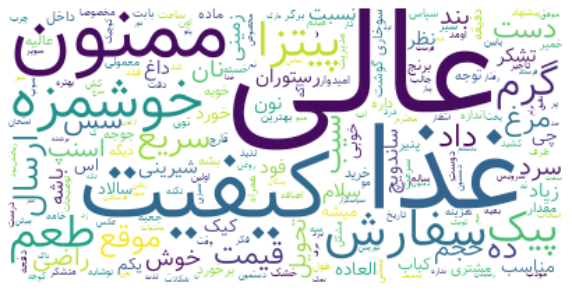

In [ ]:
label0 = train_data[train_data["label_id"] == 0]
text = " ".join(text for text in label0["preprocessing"])
show_wordcloud(text)

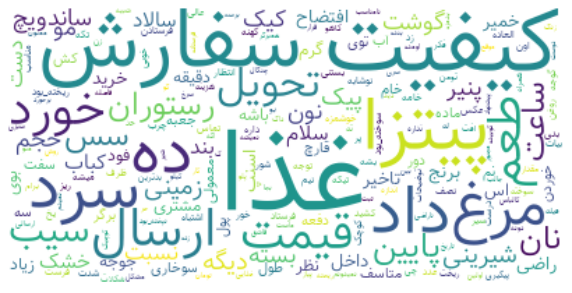

In [ ]:
label1 = train_data[train_data["label_id"] == 1]
text = " ".join(text for text in label1["preprocessing"])
show_wordcloud(text)

# Create BaseLine Model

In [ ]:
from pandas import read_excel
persent = read_excel("/content/drive/MyDrive/Mohaymen/Phase05/PerSent.xlsx", sheet_name = "Dataset")

In [ ]:
persent.head()

,Words,POS,Polarity
0,خوب,Adj,0.70
1,بد,Adj,-0.69
2,درست,Adj,0.00
3,غلط,Adj,-0.50
4,زیبا,Adj,0.00


In [ ]:
polars = persent.loc[persent.Words == "درست"].Polarity
# type(polars)
polars.values[0]

0.0

In [ ]:
y_pred = list()
y_true = list()

def baseline(text_data):
  for text, label in zip(test_data["preprocessing"], test_data["label_id"]):
    tokenizer = Tokenizer()
    words = tokenizer.tokenize_words(text)

    sentiment = 0

    for word in words:
      if word in persent.Words.values:
        sentiment += persent.loc[persent.Words == word]. Polarity.values[0]
    if sentiment >= 0:
      y_pred.append(1)
    else:
      y_pred.append(0)
    y_true.append(label)
  return y_pred, y_true

In [ ]:
from sklearn.metrics import classification_report
y_pred, y_true = baseline(test_data)
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.08      0.33      0.12       814
           1       0.84      0.48      0.61      6186

    accuracy                           0.46      7000
   macro avg       0.46      0.40      0.37      7000
weighted avg       0.75      0.46      0.55      7000



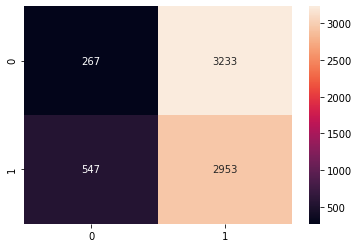

In [ ]:
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_true, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')

# Sentiment Analysis Using LSTM Neural Networks

In [1]:
import torch
from torchtext.legacy import data
if torch.cuda.is_available():
  TRAINING_ON_GPU = True
else:
  TRAINING_ON_GPU = False
SEED = 2021
torch.manual_seed(SEED)
TEXT = data.Field(tokenize='spacy', batch_first=True)
LABEL = data.LabelField(dtype=torch.float, batch_first=True)
fields = [(None, None), (None, None), ('label_id', LABEL), ('preprocessing', TEXT)]

In [2]:
train_data = data.TabularDataset(path="/content/drive/MyDrive/Mohaymen/Phase05/snappfood/train_data_preprocessing.csv", format="csv", fields=fields, skip_header=True)

In [3]:
test_data = data.TabularDataset(path="/content/drive/MyDrive/Mohaymen/Phase05/snappfood/test_data_preprocessing.csv", format="csv", fields=fields, skip_header=True)

In [4]:
valid_data = data.TabularDataset(path="/content/drive/MyDrive/Mohaymen/Phase05/snappfood/valid_data_preprocessing.csv", format="csv", fields=fields, skip_header=True)

In [5]:
TEXT.build_vocab(train_data, min_freq=3)
LABEL.build_vocab(train_data)

In [ ]:
import pandas as pd
qqq = pd.read_csv("/content/drive/MyDrive/Mohaymen/Phase05/snappfood/valid_data_preprocessing.csv")
qqq.head()

,Unnamed: 0,comment,label_id,preprocessing
0,0,همه ساندویچ‌ها سرد بود متاسفانه در صورتی که فا...,1,خواهشا خواهشا خواهشا سه ارسال شیرینی فکری کرد ...
1,1,تشکر، عالی‌تر از همیشه,0,غذا گرم کیفیت پخت گوشت عالی بود باش
2,2,مرغ و کدو رو دوس نداشتم ولی کلا ساندویچهای خوش...,0,قیمت سس شکلات بسته بند بود باش قیمت اعلامی اسن...
3,3,نمیدونم هزینه بسته بندی به چه دلیل گرفته شد؟؟؟,1,عکس توی پیج شیرینی شکری روشن رنگ هممون قاعدتا ...
4,4,یک نوشابه کم ارسال شد و تاخیر فراوان و غذای نس...,1,میگ پیتزا اینقد چرب باشه


In [6]:
print(len(TEXT.vocab))
print(len(LABEL.vocab))
print(LABEL.vocab.freqs.most_common(10))
print(TEXT.vocab.stoi)
print(LABEL.vocab)

6736
2
[('1', 28350), ('0', 28350)]
defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f761c50d450>>, {'<unk>': 0, '<pad>': 1, 'باش': 2, 'بود': 3, 'غذا': 4, 'کیفیت': 5, 'عالی': 6, 'سفارش': 7, 'داشت': 8, 'دار': 9, 'پیتزا': 10, 'کن': 11, 'کرد': 12, 'داد': 13, 'ده': 14, 'ممنون': 15, 'سرد': 16, 'خوشمزه': 17, 'طعم': 18, 'مرغ': 19, 'ارسال': 20, 'شد': 21, 'پیک': 22, 'قیمت': 23, 'مزه': 24, 'سیب': 25, 'سس': 26, 'تحویل': 27, 'نان': 28, 'بسته': 29, 'خورد': 30, 'رستوران': 31, 'گرم': 32, 'حجم': 33, 'شیرینی': 34, 'زمینی': 35, 'دست': 36, 'ساندویچ': 37, 'نون': 38, 'بند': 39, 'اسنپ': 40, 'دیگه': 41, 'نسبت': 42, 'شو': 43, 'کیک': 44, 'پنیر': 45, 'راضی': 46, 'پایین': 47, 'ساعت': 48, 'سریع': 49, 'سلام': 50, 'گوشت': 51, 'کباب': 52, 'گیر': 53, 'گرفت': 54, 'سالاد': 55, 'نظر': 56, 'فود': 57, 'زیاد': 58, 'موقع': 59, 'مو': 60, 'باشه': 61, 'مشتری': 62, 'اس': 63, 'خشک': 64, 'برنج': 65, 'جوجه': 66, 'خرید': 67, 'داخل': 68, '؟': 69, 'دقیقه': 70, 'خوبی': 71, 'میشه': 72, 'ت

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BATCH_SIZE = 50

train_iterator = data.BucketIterator(train_data, BATCH_SIZE, sort_key= lambda x: len(x.preprocessing), train=True, shuffle=True, sort_within_batch=True)

valid_iterator = data.BucketIterator(valid_data, BATCH_SIZE, sort_key= lambda x: len(x.preprocessing), train=False, shuffle=False, sort_within_batch=True)

test_iterator = data.BucketIterator(test_data, BATCH_SIZE, sort_key= lambda x: len(x.preprocessing), train=False, shuffle=False, sort_within_batch=True)


In [8]:
import torch.nn as nn
class SentimentLSTM(nn.Module):
  
  def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
    super().__init__()
    
    self.output_size = output_size
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim

    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
    
    self.dropout=nn.Dropout(0.3)

    self.fc = nn.Linear(hidden_dim, output_size)
    self.sig = nn.Sigmoid()
  
  def forward(self, x, hidden):
    batch_size = x.size(0)

    embeds = self.embedding(x)
    lstm_out, hidden = self.lstm(embeds, hidden)

    lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

    out = self.dropout(lstm_out)
    out = self.fc(out)

    sig_out = self.sig(out)

    sig_out = sig_out.view(batch_size, -1)
    sig_out = sig_out[:, -1]

    return sig_out, hidden
  
  def init_hidden(self, batch_size):
    weight = next(self.parameters()).data

    if TRAINING_ON_GPU:  
      hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())  
    else:
      hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
    
    return hidden
      

In [9]:
vocab_size = len(TEXT.vocab) + 1
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentLSTM(
  (embedding): Embedding(6737, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [10]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [ ]:
CUDA_LAUNCH_BLOCKING=1

In [11]:
def cal_acc(y_pred, y_true):
  rounded_preds = torch.round(y_pred) 
  correct = (rounded_preds == y_true).float() 
  acc = correct.sum() / len(correct)
  acc = torch.round(acc * 100)
  return acc

In [13]:
from tqdm import tqdm

lr = 0.01

val_acc = []

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)

epochs = 10

counter = 0
print_every = 100
clip = 5

if TRAINING_ON_GPU:
  net.cuda()

net.train()
for e in range(epochs):
  try:
    h = net.init_hidden(BATCH_SIZE)
  except Exception as err:
    print(err)
  loop = tqdm(enumerate(train_iterator), total = len(train_iterator), leave=False)
  loop.set_description("epoch: {}".format(e))
  loop.refresh()
  net.train()
  for i, batch in loop:
    counter += 1
    try:
      if TRAINING_ON_GPU:
        input, label = batch.preprocessing.cuda(), batch.label_id.cuda()
      else:
        input, label = batch.preprocessing, batch.label_id
    
    
      h = tuple([each.data for each in h])

      net.zero_grad()

      ipnut = input.type(torch.LongTensor)
      output, h = net(input, h)
      loss = criterion(output.squeeze(), label.float())
      loss.backward()
      nn.utils.clip_grad_norm_(net.parameters(), clip)
      optimizer.step()

    except Exception as err:
      print(err)
  scheduler.step()
  try:
    val_h = net.init_hidden(BATCH_SIZE)
    val_losses = list()
    net.eval()
    acc = 0
    val_loss = 0
    for j, batch in enumerate(valid_iterator):
      val_h = tuple([each.data for each in val_h])

      if TRAINING_ON_GPU:
        input, label = batch.preprocessing.cuda(), batch.label_id.cuda()
      else:
        input, label = batch.preprocessing, batch.label_id
        input = input.type(torch.LongTensor)

      output, val_h = net(input, val_h)
      val_loss += criterion(output.squeeze(), label.float()).item()

      acc += cal_acc(output.squeeze(), label)

    val_acc.append(acc/len(valid_iterator))
    val_losses.append(val_loss / len(valid_iterator))
  except Exception as err:
    print(err)

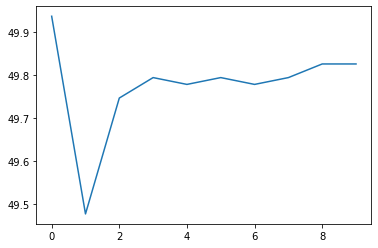

In [14]:
import numpy as np
import matplotlib.pyplot as plt

accuracies = [val.item() for val in val_acc]
indexes = [i for i in range(len(accuracies))]
plt.plot(indexes, accuracies)

In [18]:
# plt.plot(indexes, val_losses)
print(indexes)
print(val_losses)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1.2582965701345414]


In [21]:
acc = 0
val_loss = 0
y_pred, y_true = list(), list()
val_h = net.init_hidden(BATCH_SIZE)
net.eval()
for j, batch in enumerate(test_iterator):
  val_h = tuple([each.data for each in val_h])

  if TRAINING_ON_GPU:
    input, label = batch.preprocessing.cuda(), batch.label_id.cuda()
  else:
    input, label = batch.preprocessing, batch.label_id
    input = input.type(torch.LongTensor)
  
  output, val_h = net(input, val_h)
  val_loss += criterion(output.squeeze(), label.float()).item()
  acc += cal_acc(output.squeeze(), label)

  preds = torch.round(output.squeeze())
  y_pred.append(preds)
  y_true.append(label)
acc = acc / len(test_iterator)
print(acc.item())

78.80000305175781


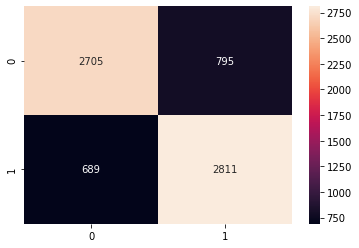

In [34]:
from sklearn import metrics
import seaborn as sns
import pandas as pd
Y_actual = []
Y_prediction = []
for tensor in y_true:
  Y_actual.append(tensor.cpu().numpy())
for tensor in y_pred:
  Y_prediction.append(tensor.cpu().detach().numpy())
Y_actual = [elm for lst in Y_actual for elm in lst]
Y_prediction = [elm for lst in Y_prediction for elm in lst]
cnf_matrix = metrics.confusion_matrix(Y_actual, Y_prediction)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')

In [35]:
print(metrics.classification_report(Y_actual, Y_prediction))

              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78      3500
         1.0       0.78      0.80      0.79      3500

    accuracy                           0.79      7000
   macro avg       0.79      0.79      0.79      7000
weighted avg       0.79      0.79      0.79      7000

